In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 1. Data Analysis

### About dataset 

In [138]:
# read dataset
df = pd.read_csv('heart.csv')

In [139]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# make a list of numerical columns
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [7]:
# make a list of categorical columns
all_columns = list(df.columns)
categoical_columns = [col for col in all_columns if col not in numerical_columns]

In [8]:
categoical_columns

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [9]:
# prepare a dataset for exploratory data analysis

In [10]:
df_eda = df.copy()

In [11]:
# convert categorical columns to string
df_eda['sex'] = df_eda['sex'].apply(lambda x : 'men' if x == 1 else 'women')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,men,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,women,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,men,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,women,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
cp_column_dict = {0 : 'typical angina', 1 : 'atypical angina', 2 : 'non-anginal pain', 3 : 'asymptomatic'}
df_eda['cp'] = df_eda['cp'].apply(lambda x : cp_column_dict[x])

In [13]:
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,1
2,41,women,atypical angina,130,204,0,0,172,0,1.4,2,0,2,1
3,56,men,atypical angina,120,236,0,1,178,0,0.8,2,0,2,1
4,57,women,typical angina,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df_eda['fbs'] = df_eda['fbs'].apply(lambda x : 'yes' if x == 1 else 'no')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,0,150,0,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,no,1,187,0,3.5,0,0,2,1
2,41,women,atypical angina,130,204,no,0,172,0,1.4,2,0,2,1
3,56,men,atypical angina,120,236,no,1,178,0,0.8,2,0,2,1
4,57,women,typical angina,120,354,no,1,163,1,0.6,2,0,2,1


In [15]:
df_eda['exng'] = df_eda['exng'].apply(lambda x : 'yes' if x == 1 else 'no')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,0,150,no,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,no,1,187,no,3.5,0,0,2,1
2,41,women,atypical angina,130,204,no,0,172,no,1.4,2,0,2,1
3,56,men,atypical angina,120,236,no,1,178,no,0.8,2,0,2,1
4,57,women,typical angina,120,354,no,1,163,yes,0.6,2,0,2,1


In [16]:
set(df_eda['restecg'])

{0, 1, 2}

In [17]:
restecg_column_dict = {0 : 'Normal', 1 : 'Abnormal', 2 : 'Hypertrophy'}
df_eda['restecg'] = df_eda['restecg'].apply(lambda x : restecg_column_dict[x])
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,Normal,150,no,2.3,0,0,1,1
1,37,men,non-anginal pain,130,250,no,Abnormal,187,no,3.5,0,0,2,1
2,41,women,atypical angina,130,204,no,Normal,172,no,1.4,2,0,2,1
3,56,men,atypical angina,120,236,no,Abnormal,178,no,0.8,2,0,2,1
4,57,women,typical angina,120,354,no,Abnormal,163,yes,0.6,2,0,2,1


In [18]:
df_eda['output'] = df_eda['output'].apply(lambda x : 'less chance' if x == 0 else 'more chance')
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,Normal,150,no,2.3,0,0,1,more chance
1,37,men,non-anginal pain,130,250,no,Abnormal,187,no,3.5,0,0,2,more chance
2,41,women,atypical angina,130,204,no,Normal,172,no,1.4,2,0,2,more chance
3,56,men,atypical angina,120,236,no,Abnormal,178,no,0.8,2,0,2,more chance
4,57,women,typical angina,120,354,no,Abnormal,163,yes,0.6,2,0,2,more chance


### Data Visualization

<AxesSubplot: xlabel='output', ylabel='age'>

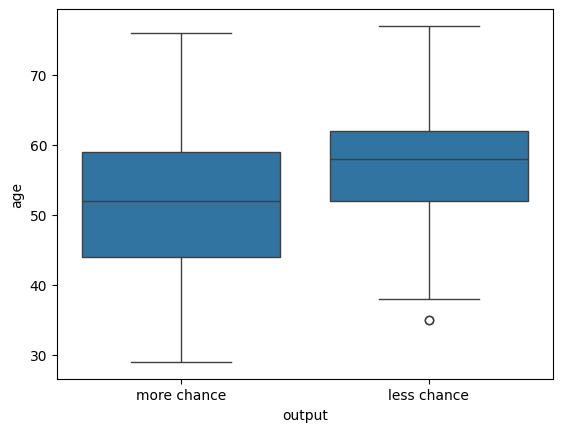

In [19]:
# Exploring the Relationship Between age and output
sns.boxplot(data=df_eda, x='output', y='age')

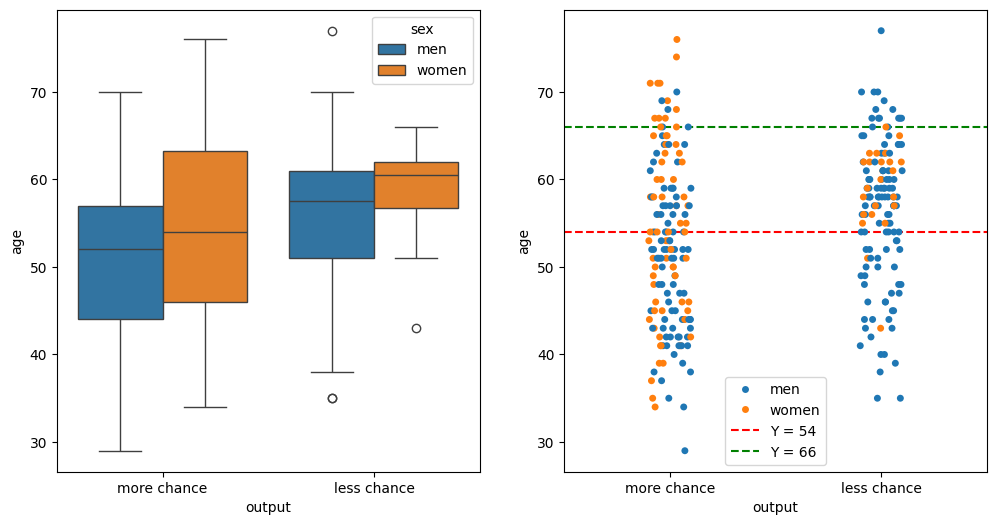

In [20]:
# Exploring the Relationship of sex, age and output
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df_eda, x='output', y='age', hue = 'sex')
plt.subplot(1,2,2)
sns.stripplot(data=df_eda, x='output', y='age', hue = 'sex')
h_value_1 = 54
h_value_2 = 66
plt.axhline(y=h_value_1, color='red', linestyle='--', label=f'Y = {h_value_1}')
plt.axhline(y=h_value_2, color='green', linestyle='--', label=f'Y = {h_value_2}')
plt.legend()

#### از نمودار سمت راست میتوان متوجه شد که در این دیتاست خانم ها در سنین کمتر از 54 و بیشتر از 68 شانس بالایی برای حمله قلبی دارند.

<AxesSubplot: xlabel='cp', ylabel='count'>

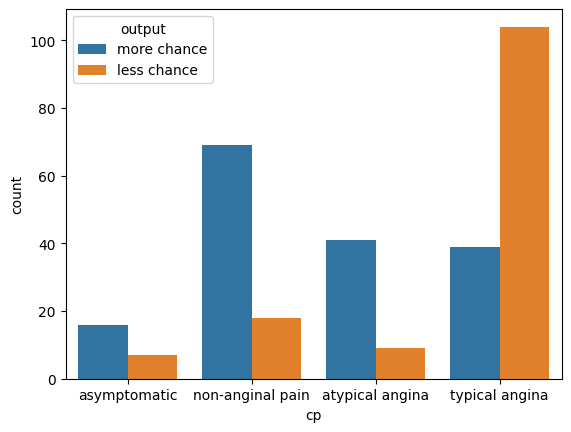

In [21]:
# Exploring the Relationship between cp and output
sns.countplot(data = df_eda, x = 'cp', hue = 'output')

<AxesSubplot: xlabel='cp', ylabel='age'>

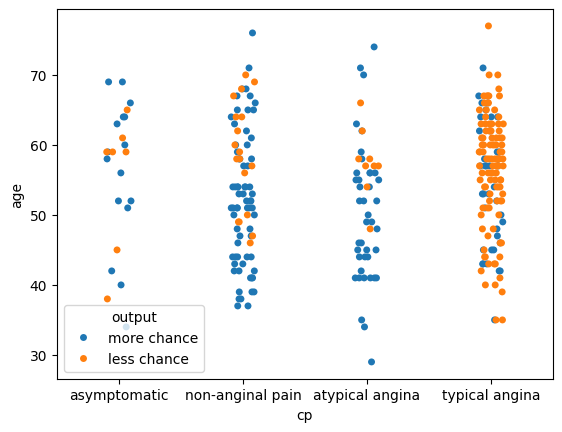

In [22]:
# Exploring the Relationship of cp , age and output
sns.stripplot(data=df_eda, x='cp', y='age', hue = 'output')

افراد گروه 4 در تمامی سنین احتمال مله قلبی دارند. دسته دو و سه در سنین کمتر از 45 حمله قلبی مشاهده نمیشود.

In [23]:
df_eda.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,men,asymptomatic,145,233,yes,Normal,150,no,2.3,0,0,1,more chance
1,37,men,non-anginal pain,130,250,no,Abnormal,187,no,3.5,0,0,2,more chance
2,41,women,atypical angina,130,204,no,Normal,172,no,1.4,2,0,2,more chance
3,56,men,atypical angina,120,236,no,Abnormal,178,no,0.8,2,0,2,more chance
4,57,women,typical angina,120,354,no,Abnormal,163,yes,0.6,2,0,2,more chance


<AxesSubplot: xlabel='trtbps', ylabel='Count'>

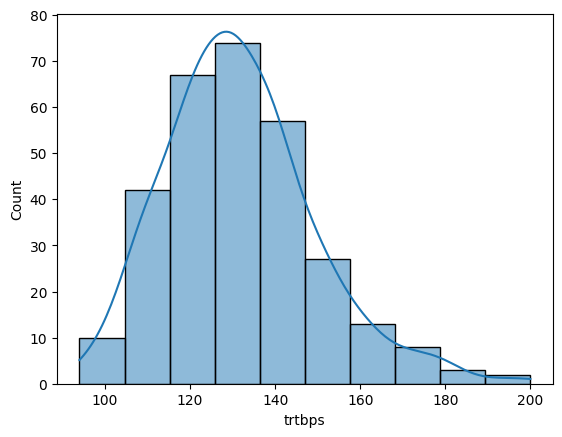

In [24]:
sns.histplot(df_eda['trtbps'], kde = True, bins = 10)

In [25]:
def plot_relplot (df, numerical_x, numerical_y, categorical_hue, categorical_2, categorical_3):
    sns.relplot(data = df, x = numerical_x, y = numerical_y, col = categorical_2, row = categorical_3, hue = categorical_hue)

<Figure size 2400x1200 with 0 Axes>

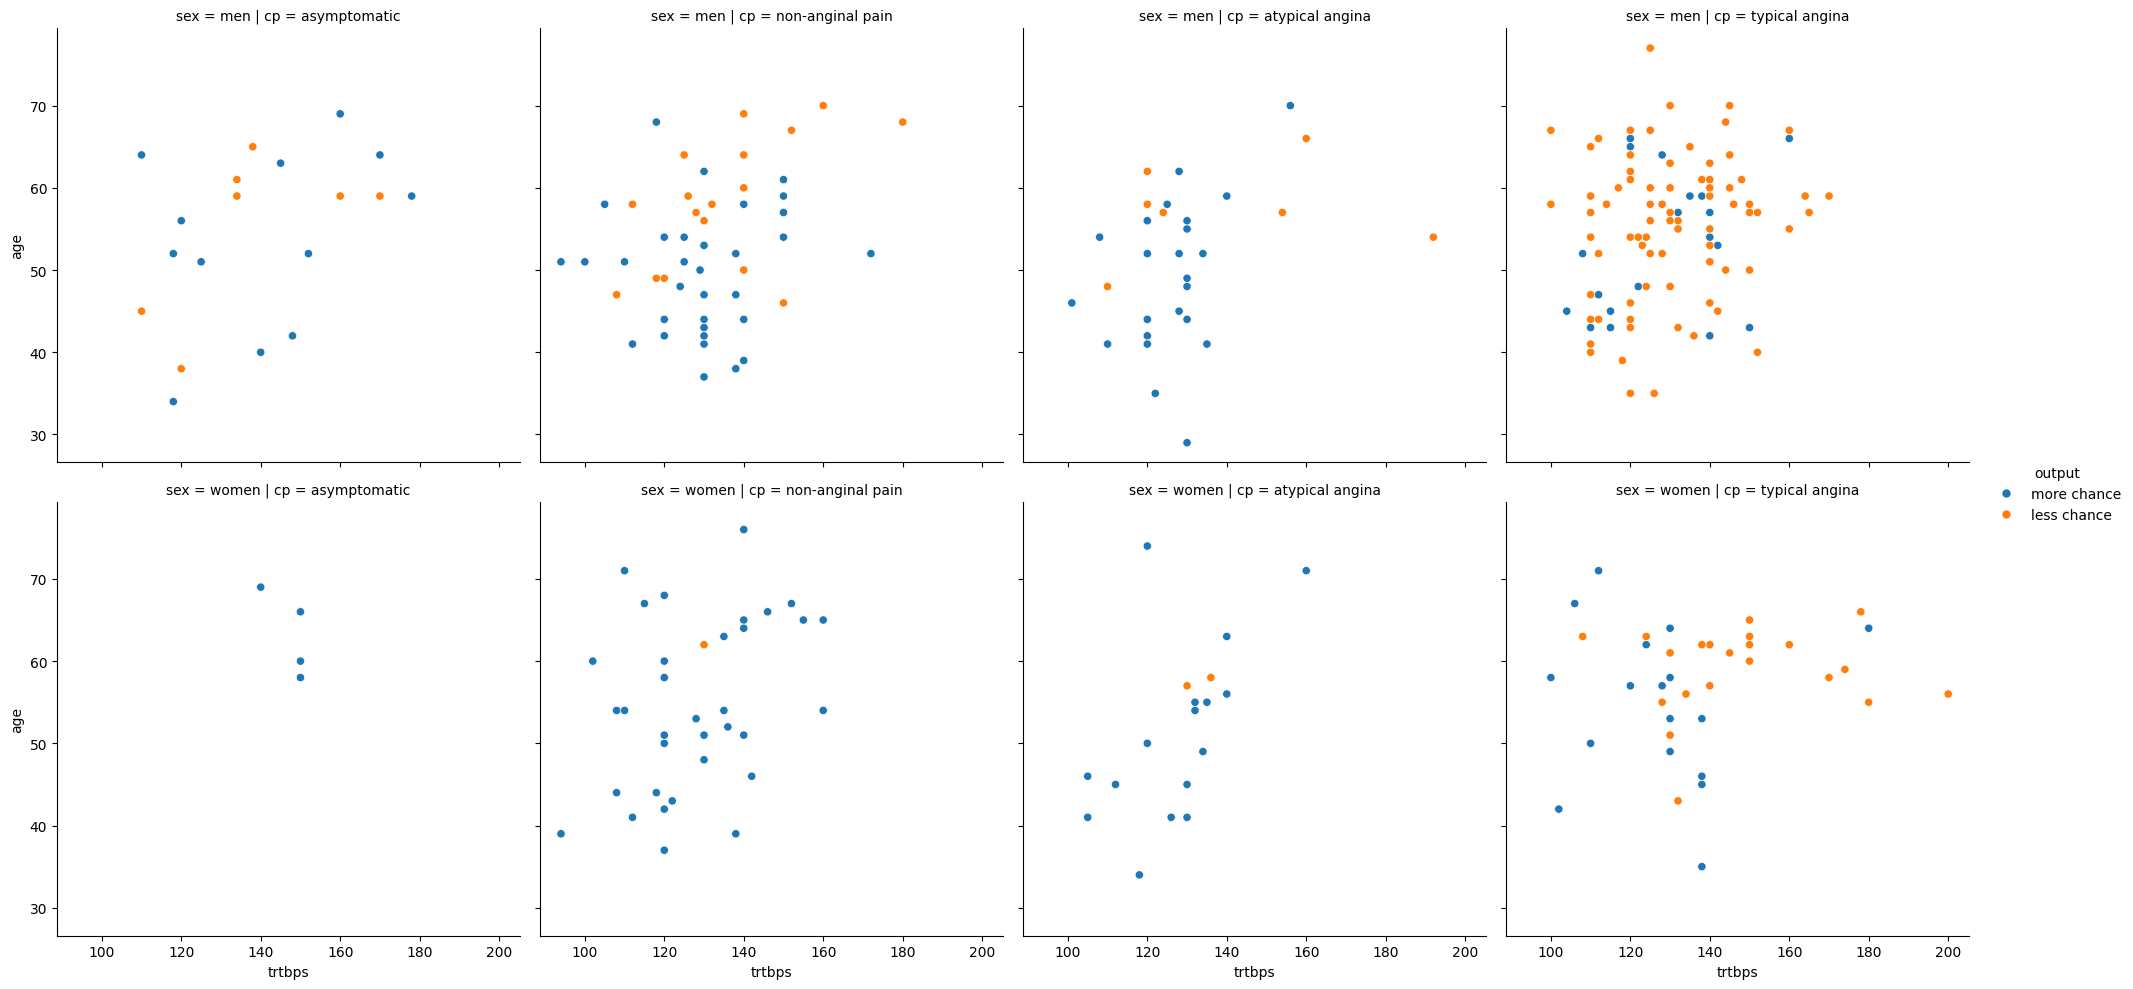

In [26]:
plt.figure(dpi = 200, figsize = (12,6))
sns.relplot(data = df_eda, x = 'trtbps', y = 'age', col = 'cp', row = 'sex', hue = 'output')

توضیح سه نمودار ردیف2

<Figure size 2400x1200 with 0 Axes>

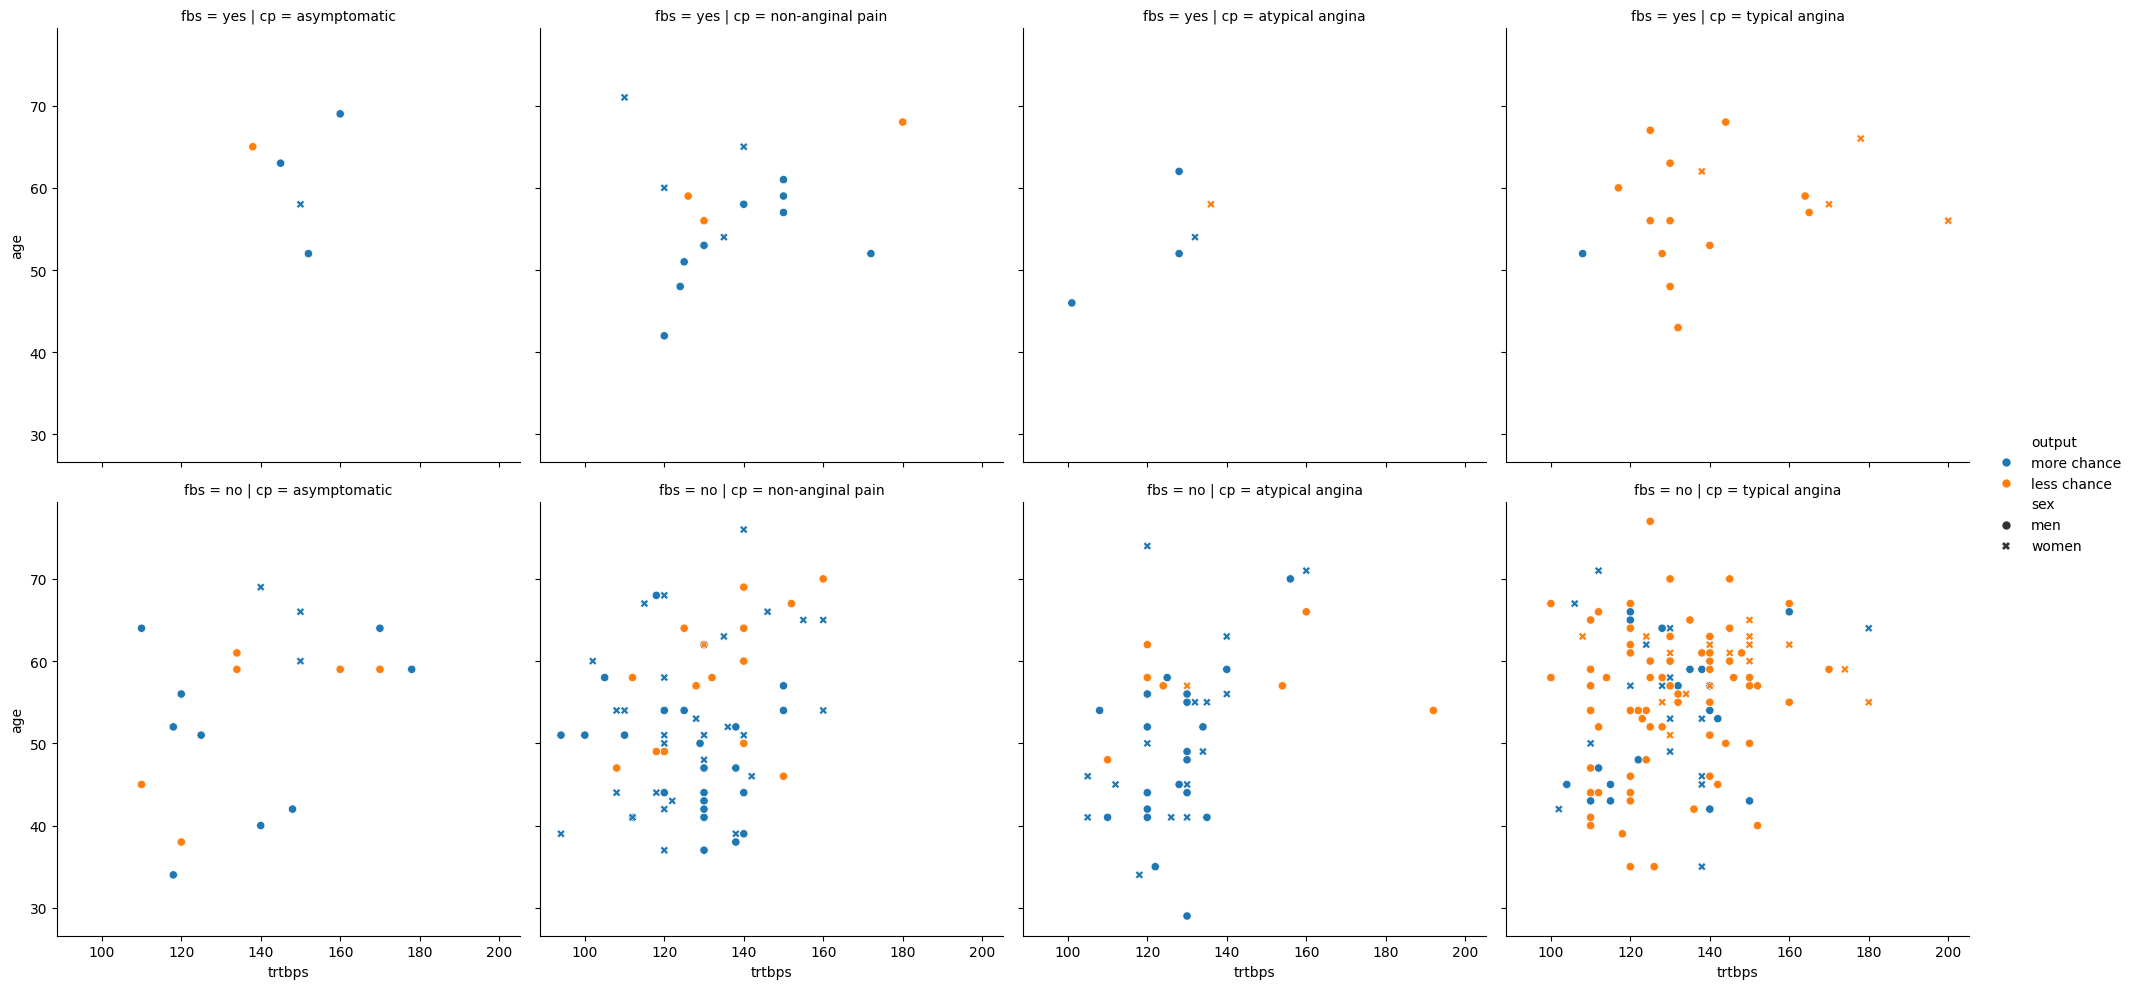

In [27]:
plt.figure(dpi = 200, figsize = (12,6))
sns.relplot(data = df_eda, x = 'trtbps', y = 'age', col = 'cp', row = 'fbs', hue = 'output', style = 'sex')

توضیح نمودار های ردیف اول

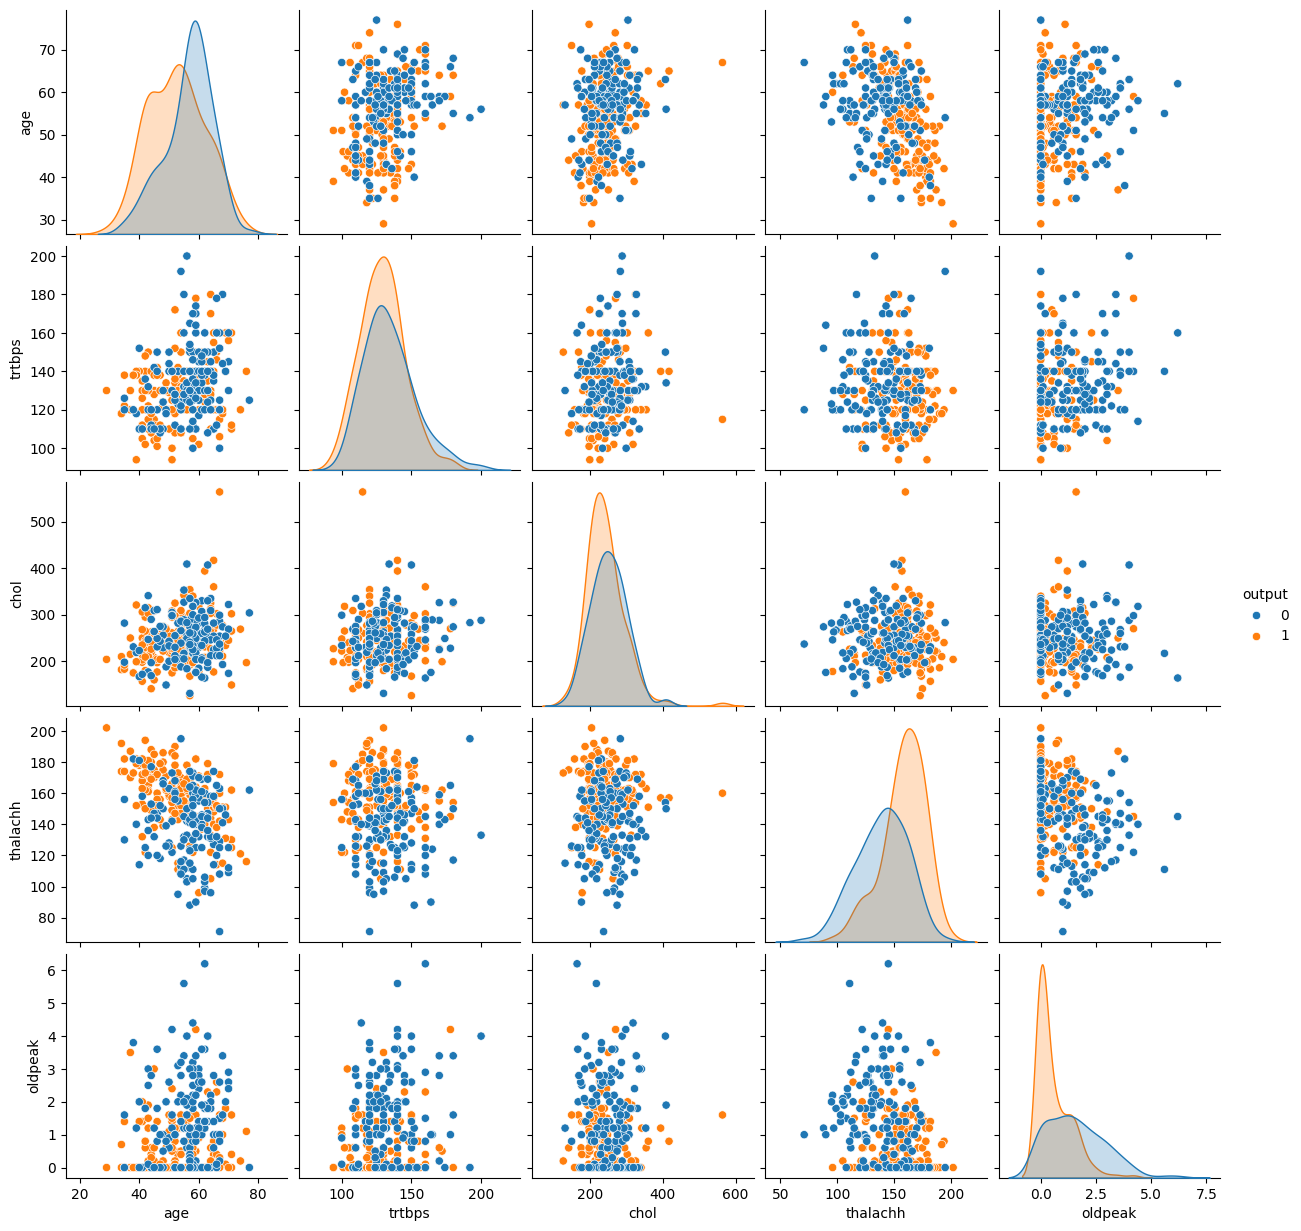

In [28]:
# Create a pair plot for 'age,' 'chol,' 'trtbps,' and 'output'
sns.pairplot(data=df, vars=numerical_columns, hue='output')
plt.show()

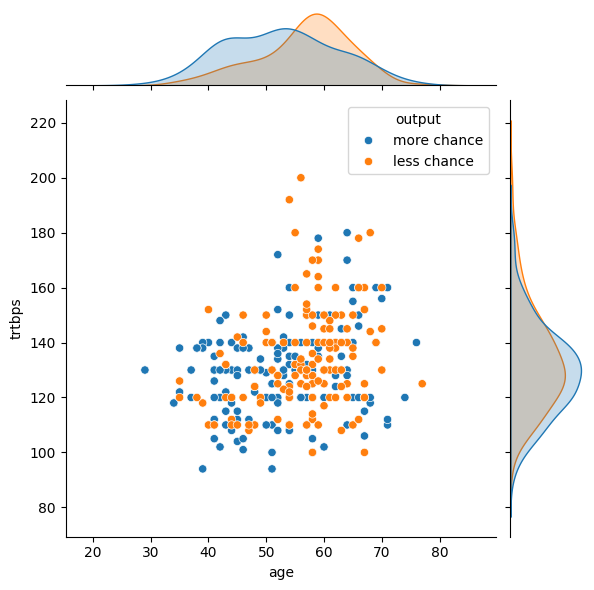

In [29]:
sns.jointplot(data=df_eda, x="age", y="trtbps", hue="output")

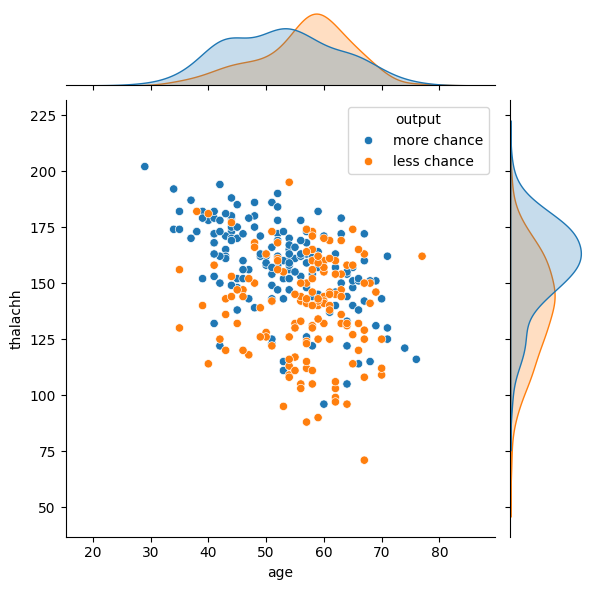

In [30]:
sns.jointplot(data=df_eda, x="age", y="thalachh", hue="output")

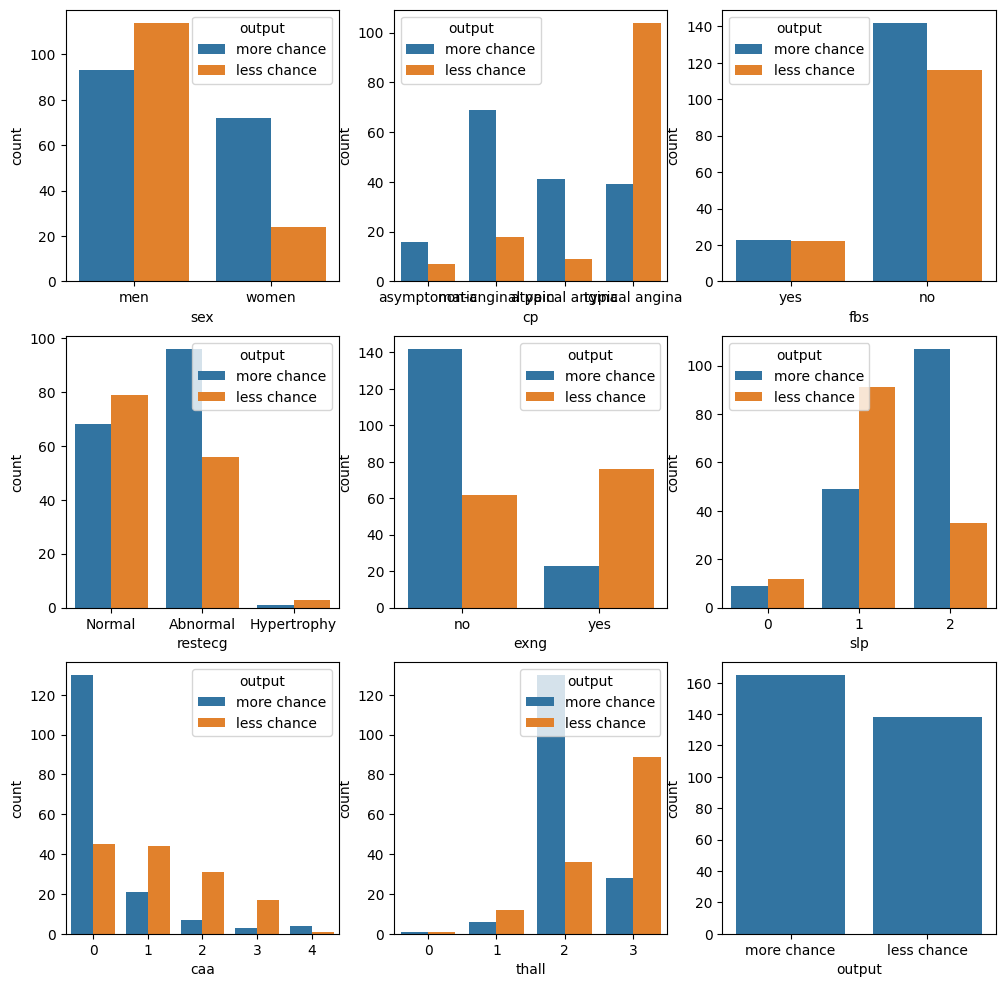

In [31]:
plt.figure(figsize = (12,12))
for col in categoical_columns :
    plt.subplot(3,3, categoical_columns.index(col) + 1)
    if col != 'output' :
        
        sns.countplot(data = df_eda, x = col, hue = 'output')
    else :
        sns.countplot(data = df_eda, x = col)

In [32]:
categoical_columns

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Train a machine learning model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [140]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
# preprocess data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [35]:
# Convert features to categorical
for feature in categoical_columns:
    df[feature] = df[feature].astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [37]:
df.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [38]:
# one hot encoding categorical features
columns_to_encode = categoical_columns.remove('output')
df_onehot = pd.get_dummies(df, columns=categoical_columns)
df_onehot.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [39]:
# choose dataframe
df_final = df_onehot # df

In [40]:
# Extracting features (X) and target variable (y)
X = df_final.drop('output', axis=1)  # Exclude the 'target' column
y = df_final['output']

In [41]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the train data into training and dev sets (80% train, 20% dev)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [42]:
y_train.value_counts()

1    105
0     88
Name: output, dtype: int64

In [43]:
# normalize dataset, fit to train data and applying to other
# fit scalaer to tranin data
scaler = MinMaxScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [44]:
# apply scalar to test and validation sets
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [45]:
model = LogisticRegression( random_state=12, verbose = 3 )

In [46]:
# Train the Model
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(random_state=12, verbose=3)

In [47]:
# Validate the Model
y_val_pred = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.8979591836734694


In [48]:
# train prediction
y_val_pred = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.8979591836734694


In [49]:
# Validate the Model
y_train_pred = model.predict(X_train)
validation_accuracy = accuracy_score(y_train, y_train_pred)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.8549222797927462


In [50]:
y_train_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [51]:
# Test the Model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8688524590163934


In [52]:
def plot_confusion(y_real, y_predict):
    
    conf_matrix = confusion_matrix(y_real, y_predict)

    # Plot the Confusion Matrix
    #plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

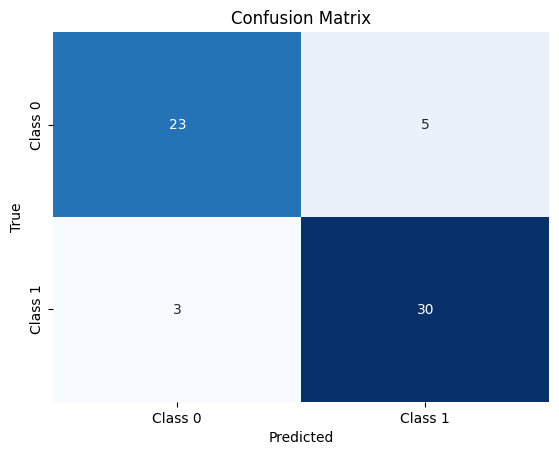

In [53]:
plot_confusion(y_test, y_test_pred)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [55]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [56]:
y_test.value_counts()

1    33
0    28
Name: output, dtype: int64

In [57]:
# normalize dataset, fit to train data and applying to other
# fit scalaer to tranin data
scaler = MinMaxScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [58]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# hyper parameter tuning

## C

In [59]:
# tune parameter
# Define hyperparameters to tune
param_grid = {
  # 'l1' for L1 regularization, 'l2' for L2 regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [60]:
logistic_model = LogisticRegression(random_state=42, solver = 'liblinear')

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer

In [62]:
f1_scorer = make_scorer(f1_score)

In [90]:
# Perform grid search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring = f1_scorer,
                           return_train_score=True ,verbose= 4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......C=0.001;, score=(train=0.867, test=0.820) total time=   0.0s
[CV 2/5] END .......C=0.001;, score=(train=0.864, test=0.831) total time=   0.0s
[CV 3/5] END .......C=0.001;, score=(train=0.862, test=0.839) total time=   0.0s
[CV 4/5] END .......C=0.001;, score=(train=0.841, test=0.912) total time=   0.0s
[CV 5/5] END .......C=0.001;, score=(train=0.846, test=0.893) total time=   0.0s
[CV 1/5] END ........C=0.01;, score=(train=0.882, test=0.807) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=0.862, test=0.862) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=0.864, test=0.897) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=0.866, test=0.863) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=0.857, test=0.906) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.877, test=0.830) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.868,

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring=make_scorer(f1_score), verbose=4)

In [91]:
grid_search.best_estimator_

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

In [92]:
best_model = grid_search.best_estimator_

In [93]:
best_model.predict(X_train)

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [145]:
result = grid_search.cv_results_
result

{'mean_fit_time': array([0.00220213, 0.0023994 , 0.00299931, 0.00219893, 0.00220299]),
 'std_fit_time': array([0.00039723, 0.00048944, 0.00109381, 0.00039971, 0.00040675]),
 'mean_score_time': array([0.03952589, 0.00620399, 0.00759592, 0.00660357, 0.00698867]),
 'std_score_time': array([0.06505991, 0.00040641, 0.00185894, 0.00048743, 0.00062597]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9}],
 'split0_test_score': array([0.60377358, 0.66666667, 0.68965517, 0.71428571, 0.70588235]),
 'split1_test_score': array([0.59259259, 0.71186441, 0.7       , 0.6557377 , 0.63157895]),
 'split2_test_score': array([0.58181818, 0.59259259, 0.64      , 0.62745098, 0.69387755]),
 'split3_test_score': array([0.64285714, 0.75471698, 0.73469388, 0.72      , 0.76923077]),


In [95]:
mean_test_score = result['mean_test_score']

In [96]:
mean_train_score = result['mean_train_score']

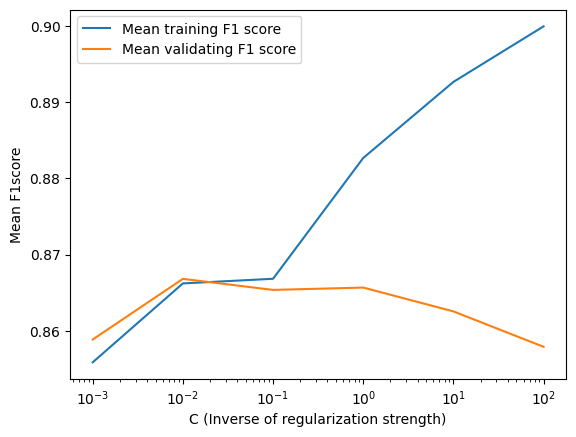

In [100]:
plt.plot(param_grid['C'], mean_train_score)
plt.plot(param_grid['C'], mean_test_score)

# Set x-axis as logarithmic
plt.xscale('log')

# Add legend, xlabel, and ylabel
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Mean F1score')
plt.legend(['Mean training F1 score', 'Mean validating F1 score'])

## degree of plynomial feature

In [105]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import PolynomialFeatures

In [111]:
# Define Polynomial Degrees to Test
degrees = [1, 2, 3, 4]

mean_train_score = []
mean_test_score = []
# Perform Cross-Validation
for degree in degrees:
    
    poly = PolynomialFeatures(degree)
    
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, 
                                                        stratify=y, random_state=42)
    
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    model = LogisticRegression(random_state=42, solver = 'liblinear')
    
    cv_results = cross_validate(model, X_poly, y, cv=cv,
                                return_train_score=True)

    mean_train_score.append(cv_results['train_score'].mean())
    mean_test_score.append(cv_results['test_score'].mean())
    

C:\Users\CN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\CN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\CN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\CN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\CN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Us

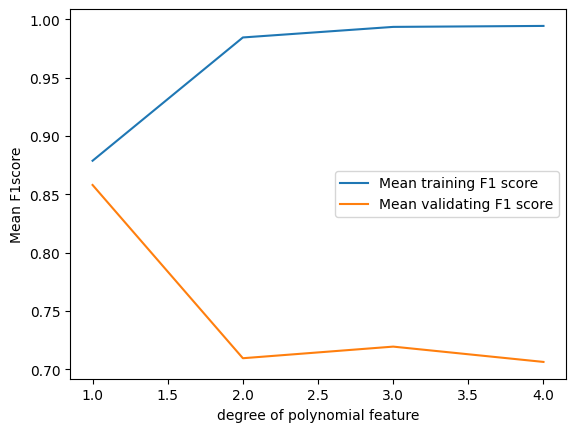

In [112]:
plt.plot(degrees, mean_train_score)
plt.plot(degrees, mean_test_score)

# Add legend, xlabel, and ylabel
plt.xlabel('degree of polynomial feature')
plt.ylabel('Mean F1score')
plt.legend(['Mean training F1 score', 'Mean validating F1 score'])

#### best logestic regression model :  degree = 1, C = 0.01

# knn 

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [148]:
# Define parameter grid for KNN
param_grid = {'n_neighbors': [ 5, 7, 9, 12, 15]}

In [149]:
# Initialize KNN model
knn = KNeighborsClassifier()

In [150]:
# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring = f1_scorer,
                           return_train_score=True ,verbose= 4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .n_neighbors=5;, score=(train=0.793, test=0.690) total time=   0.0s
[CV 2/5] END .n_neighbors=5;, score=(train=0.784, test=0.700) total time=   0.0s
[CV 3/5] END .n_neighbors=5;, score=(train=0.798, test=0.640) total time=   0.0s
[CV 4/5] END .n_neighbors=5;, score=(train=0.738, test=0.735) total time=   0.0s
[CV 5/5] END .n_neighbors=5;, score=(train=0.777, test=0.764) total time=   0.0s
[CV 1/5] END .n_neighbors=7;, score=(train=0.764, test=0.714) total time=   0.0s
[CV 2/5] END .n_neighbors=7;, score=(train=0.753, test=0.656) total time=   0.0s
[CV 3/5] END .n_neighbors=7;, score=(train=0.802, test=0.627) total time=   0.0s
[CV 4/5] END .n_neighbors=7;, score=(train=0.749, test=0.720) total time=   0.0s
[CV 5/5] END .n_neighbors=7;, score=(train=0.753, test=0.786) total time=   0.0s
[CV 1/5] END .n_neighbors=9;, score=(train=0.772, test=0.706) total time=   0.0s
[CV 2/5] END .n_neighbors=9;, score=(train=0.751,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 12, 15]},
             return_train_score=True, scoring=make_scorer(f1_score), verbose=4)

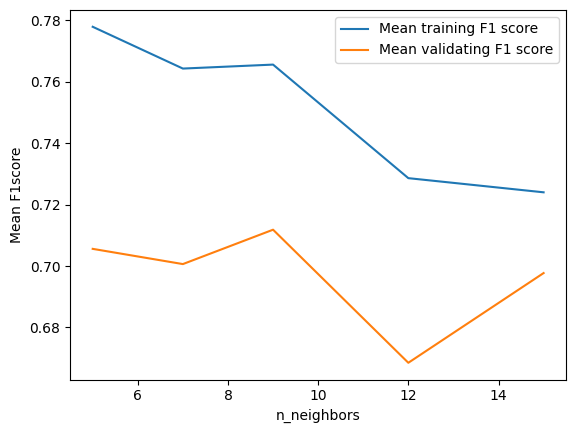

In [151]:
result = grid_search.cv_results_

mean_test_score = result['mean_test_score']
mean_train_score = result['mean_train_score']

plt.plot(param_grid['n_neighbors'], mean_train_score)
plt.plot(param_grid['n_neighbors'], mean_test_score)

# Add legend, xlabel, and ylabel
plt.xlabel('n_neighbors')
plt.ylabel('Mean F1score')
plt.legend(['Mean training F1 score', 'Mean validating F1 score'])

# compare models

In [123]:
lr = LogisticRegression(random_state=42, C =0.02, solver = 'liblinear')

knn = KNeighborsClassifier(n_neighbors = 9) # grid_search.best_estimator_

In [121]:
cv=KFold(n_splits=5, shuffle=True, random_state=42)

In [124]:
cv_results_lr = cross_validate(lr, X, y, scoring='accuracy', return_train_score=True)
cv_results_knn = cross_validate(knn, X, y, scoring='accuracy', return_train_score=True)

In [125]:
cv_results_lr['train_score']

array([0.82644628, 0.80165289, 0.82231405, 0.82304527, 0.81481481])

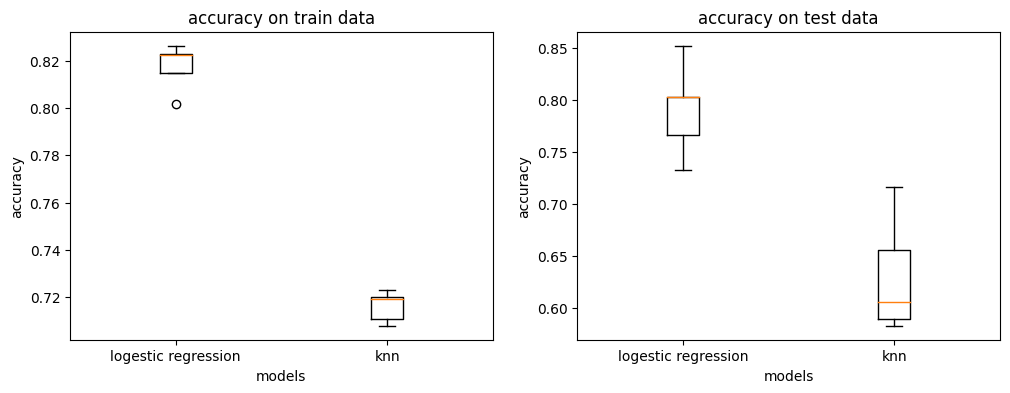

In [130]:
# Create a boxplot for two lists
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.boxplot([cv_results_lr['train_score'], cv_results_knn['train_score']],
            labels=['logestic regression', 'knn'])

# Add labels and title
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy on train data')

plt.subplot(1,2,2)
# Create a boxplot for two lists
plt.boxplot([cv_results_lr['test_score'], cv_results_knn['test_score']],
            labels=['logestic regression', 'knn'])

# Add labels and title
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy on test data')

# Show the plot
plt.show()

In [132]:

data = {
    'Model': ['logestic model', 'knn'],
    'Train Accuracy': [cv_results_lr['train_score'].mean(), cv_results_knn['train_score'].mean()],
    'Test Accuracy': [cv_results_lr['test_score'].mean(), cv_results_knn['test_score'].mean()]
}

df = pd.DataFrame(data)


In [136]:
df

,Model,Train Accuracy,Test Accuracy
0,logestic model,0.817655,0.791803
1,knn,0.716175,0.630492


In [135]:
# Melt the DataFrame to have 'Model' as a categorical variable and 'Accuracy' as the values
df_melted = pd.melt(df, id_vars='Model', var_name='Dataset', value_name='Accuracy')
df_melted


,Model,Dataset,Accuracy
0,logestic model,Train Accuracy,0.817655
1,knn,Train Accuracy,0.716175
2,logestic model,Test Accuracy,0.791803
3,knn,Test Accuracy,0.630492


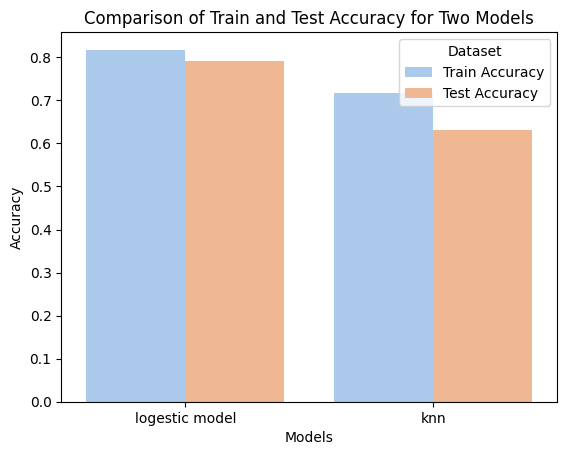

In [134]:
# Use seaborn to create a grouped bar chart
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df_melted, palette='pastel')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracy for Two Models')

# Show the plot
plt.show()